In [14]:
import numpy as np
import glob
import pandas as pd
import datetime
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

date = 20170714  # Format:  YYYYMMDD
plotTG = True  # True if trace gas, otherwise aerosol extinction assumed
#whatisit = 'AerExt'   # What is being plotted (for save name)
whatisit = 'NO2'
#whatisit = 'HCHO'

#root = 'C:\\Sciatran2\\AEROSOL_RETRIEVAL_v-1-5\\Campaign\\'
folder = 'BM_aer_retr_Julyfireperiod\\'+str(date)+'\\profiles\\NO2_profiles\\'

root = 'C:\\Sciatran2\\TRACEGAS_RETRIEVAL_v-1-4\\Campaign\\'
#folder = 'BM_aer_retr1_HCHO\\20170221\\profiles\\'

total_path = root+folder

retrieved_ = pd.DataFrame()
height_ = pd.DataFrame()
times = []

allFiles = glob.glob(total_path + "/*.dat")
for file in allFiles:
    name = file[-29:]
    year = name[10:14]
    month = name[14:16]
    day = name[16:18]
    hour = name[19:21]
    minute = name[21:23]
    sec = name[23:25]

    date = day+'/'+month+'/'+year
    time = hour+':'+minute
    #print(date+' '+time)
    f = pd.read_csv(file, header=0, delim_whitespace=True)
    #retrieved_['0'] = f['z']
    #retrieved['z'] = f['z']
    if plotTG == True:
        retrieved_[str(time)] = f['retr_vmr']
    else:
        retrieved_[str(time)] = f['retrieved']
    times.append(date+' '+time)
    
retrieved = retrieved_.transpose()
retrieved = retrieved.reset_index()
Retrieved_ = retrieved.set_index(retrieved['index'])
Retrieved_ = Retrieved_.drop(['index'], axis=1)
Retrieved = Retrieved_.transpose()
Retrieved['z'] = f['z']
data = Retrieved.set_index(['z'])
data = data.sort_index(axis=1, ascending=False)

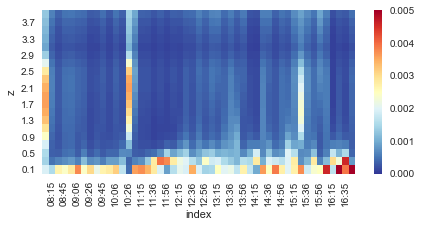

In [15]:
fig, ax = plt.subplots(figsize=(7,3))
sns.heatmap(data[:], ax=ax, cmap ='RdYlBu_r', vmin=0, vmax=0.005)
ax.invert_yaxis()
ax.invert_xaxis()
#ax.set_xticklabels(data_['DateTime'].dt.strftime('%hh:%mm:%ss'))
#ax.xaxis.set_major_locator(dates.HourLocator())
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    
fig.savefig(root+folder+whatisit+'_plot.pdf', bbox_inches='tight')

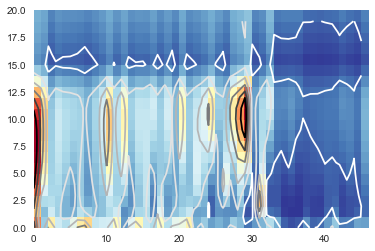

In [11]:
plt.pcolormesh(data, cmap='RdYlBu_r')
plt.colorbar
plt.contour(data)

In [71]:
import numpy as np
import glob
import pandas as pd
import datetime
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#root = 'C:\\Sciatran2\\AEROSOL_RETRIEVAL_v-1-5\\Campaign\\'
#folder = 'BM_aer_retr1\\20170221\\profiles\\'
root = 'C:\\Sciatran2\\TRACEGAS_RETRIEVAL_v-1-4\\Campaign\\'
folder = 'BM_aer_retr1\\20170221\\profiles\\'

total_path = root+folder

retrieved_ = pd.DataFrame()
height_ = pd.DataFrame()
times = []

allFiles = glob.glob(total_path + "/*.dat")
for file in allFiles:
    name = file[-29:]
    year = name[10:14]
    month = name[14:16]
    day = name[16:18]
    hour = name[19:21]
    minute = name[21:23]
    sec = name[23:25]

    date = day+'/'+month+'/'+year
    time = hour+':'+minute+':'+sec
    #print(date+' '+time)
    f = pd.read_csv(file, header=0, delim_whitespace=True)
    #retrieved_['0'] = f['z']
    #retrieved['z'] = f['z']
    retrieved_[str(time)] = f['retr_vmr']
    times.append(date+' '+time)
height_['z'] = f['z']

y = height_.as_matrix()
x = times
z = retrieved_.as_matrix()

ValueError: could not convert string to float: '21/02/2017 06:08:30'

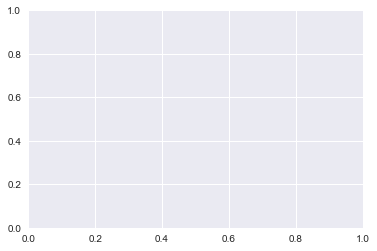

In [73]:
plt.figure()
plt.contourf(x,y,z)